In [3]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import matplotlib as mpl

In [4]:
sns.set(style='whitegrid', palette='pastel', color_codes=True)
#sns.mpl.rc('figure', figsize=(10,6))
%matplotlib inline

%config InlineBackend.figure_format='retina'

In [5]:
#shp_path = “./Comunas_RM_Mapas_Vectoriales/Comuna.shp”
#sf = shp.Reader(shp_path)



#print(data[0].astype(float))
#print(data)
#data.loc['2020']
#_2020=data.loc['2020']
#print(_2020)
#_2011=data.loc['2011']
#aa=pd.DataFrame(_2020)
#print(data.dtypes)
#print(_2020.loc[' Colac Otway']) #there is a space in the variable name
#print(np.min(_2020))
#print(np.max(_2020))

In [8]:
#sf.records()
#print(sf.fields[1:])
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

#def plot_shape(id, s=None):
#    """ PLOTS A SINGLE SHAPE """
#    plt.figure()
#    ax = plt.axes()
#    ax.set_aspect('equal')
#    shape_ex = sf.shape(id)
#    x_lon = np.zeros((len(shape_ex.points),1))
#    y_lat = np.zeros((len(shape_ex.points),1))
#    for ip in range(len(shape_ex.points)):
#        x_lon[ip] = shape_ex.points[ip][0]
#        y_lat[ip] = shape_ex.points[ip][1]
#    plt.plot(x_lon,y_lat) 
#    x0 = np.mean(x_lon)
#    y0 = np.mean(y_lat)
#    plt.text(x0, y0, s, fontsize=10)
#    # use bbox (bounding box) to set plot limits
#    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
#    return x0, y0

def region(df):
    #ax = plt.axes()
    
    coord_tot=df['coords']
    print(coord_tot)
    #ax.set_aspect('equal')
    for coords in coord_tot:
        #print(coords)
        #coords=k[0]
        #print(coords)
        y_lon=np.zeros(len(coords))
        x_lat=np.zeros(len(coords))
        for count,i in enumerate(coords):
            #print(i)
            #print(count)
            x_lat[count]=i[0]  #lat
            y_lon[count]=i[1]
            #plt.figure()
    x0 = np.mean([np.min(x_lat),np.max(x_lat)])
    y0 = np.mean([np.min(y_lon),np.max(y_lon)])
        
    return x_lat,y_lon,x0,y0#plt.plot(x_lat,y_lon)



def plot_vic(data_year,lgas,title,limx=[144,146],limy=[-38.25,-37.5],limits=False):
    fig, axs = plt.subplots()
    for _id,lga in enumerate(lgas):

        shp_path = 'lgas/'+lga+'/EXTRACT_POLYGON.shp'
        sf = shp.Reader(shp_path)



        df = read_shapefile(sf)
        #df.index
        x_lat,y_lon,x0,y0=region(df)
        #test_lat,test_lon=np.meshgrid(x_lat,y_lon)
        #axs.scatter(test_lat,test_lon,s=2,zorder=20)
        #fig, ax = plt.subplots()
        #axs.fill(x_lat,y_lon, c='C1')
        axs.plot(x_lat,y_lon,c='k',linewidth=0.5,alpha=0.5)
        fig.set_size_inches(18.5, 10.5,forward=True)
        cmap = mpl.cm.get_cmap('Purples')
        norm = mpl.colors.Normalize(vmin=np.min(data_year), vmax=np.max(data_year))
        lga_split=lga.split(' ')
        for count,word in enumerate(lga_split):
            lga_split[count]=word.capitalize()
        lga = ' '.join(lga_split)
        #print(lga)
        #print(lga.split(' ').capitalize())
        #print(_2020.loc[' '+lga.capitalize()].to_numpy())
        #print(lga.split(' '))
        rgba = cmap(norm(data_year.loc[' '+lga].to_numpy()))
        #print()
        #colour=mpl.colors.to_hex(rgba[])
        axs.fill(x_lat,y_lon, c=rgba[0][:-1])

        #axs.colourbar()

        #axs.text(x0, y0, lga, fontsize=7,ha='center', va='center')#, #transform=axs.transAxes)
        #limx=[144,146]
        #limy=[-38.25,-37.5]
        if limits==True:
            axs.set_ylim(limy )
            axs.set_xlim(limx )
            if x0>limx[0] and x0<limx[1] and y0>limy[0] and y0<limy[1]:

                axs.annotate(s=lga,xy=[x0, y0], fontsize=6,ha='center', va='center',c='silver',weight='bold')
        else:
            axs.annotate(s=lga,xy=[x0, y0], fontsize=6,ha='center', va='center',c='silver',weight='bold')

    axs.set_xlabel('Latitude ($^\circ$)')
    axs.set_ylabel('Longitude ($^\circ$)')
    axs.set_title(title)
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=axs)
    fig.savefig("test.png",bbox_inches='tight',dpi=250)


Year                            int64
Year ending                    object
Police Region                  object
Local Government Area          object
Incidents Recorded             object
Rate per 100,000 population    object
dtype: object
0      5242.0
1      7447.2
2      7058.5
3      4814.6
4      6487.9
        ...  
862    5696.9
863    2099.4
864    3577.9
866       NaN
868       NaN
Name: Rate per 100,000 population, Length: 810, dtype: float64
0    [(147.32087564999995, -37.023108519999994), (1...
Name: coords, dtype: object
0    [(142.41911328000003, -37.473453140000004), (1...
Name: coords, dtype: object
0    [(143.84321761, -37.67028291999998), (143.8430...
Name: coords, dtype: object
0    [(145.07517741000004, -37.759141039999975), (1...
Name: coords, dtype: object
0    [(145.50141263, -38.57221972000002), (145.4963...
Name: coords, dtype: object
0    [(145.76264682, -37.99176584000003), (145.7627...
Name: coords, dtype: object
0    [(145.00754833999997, -37.95812028), (

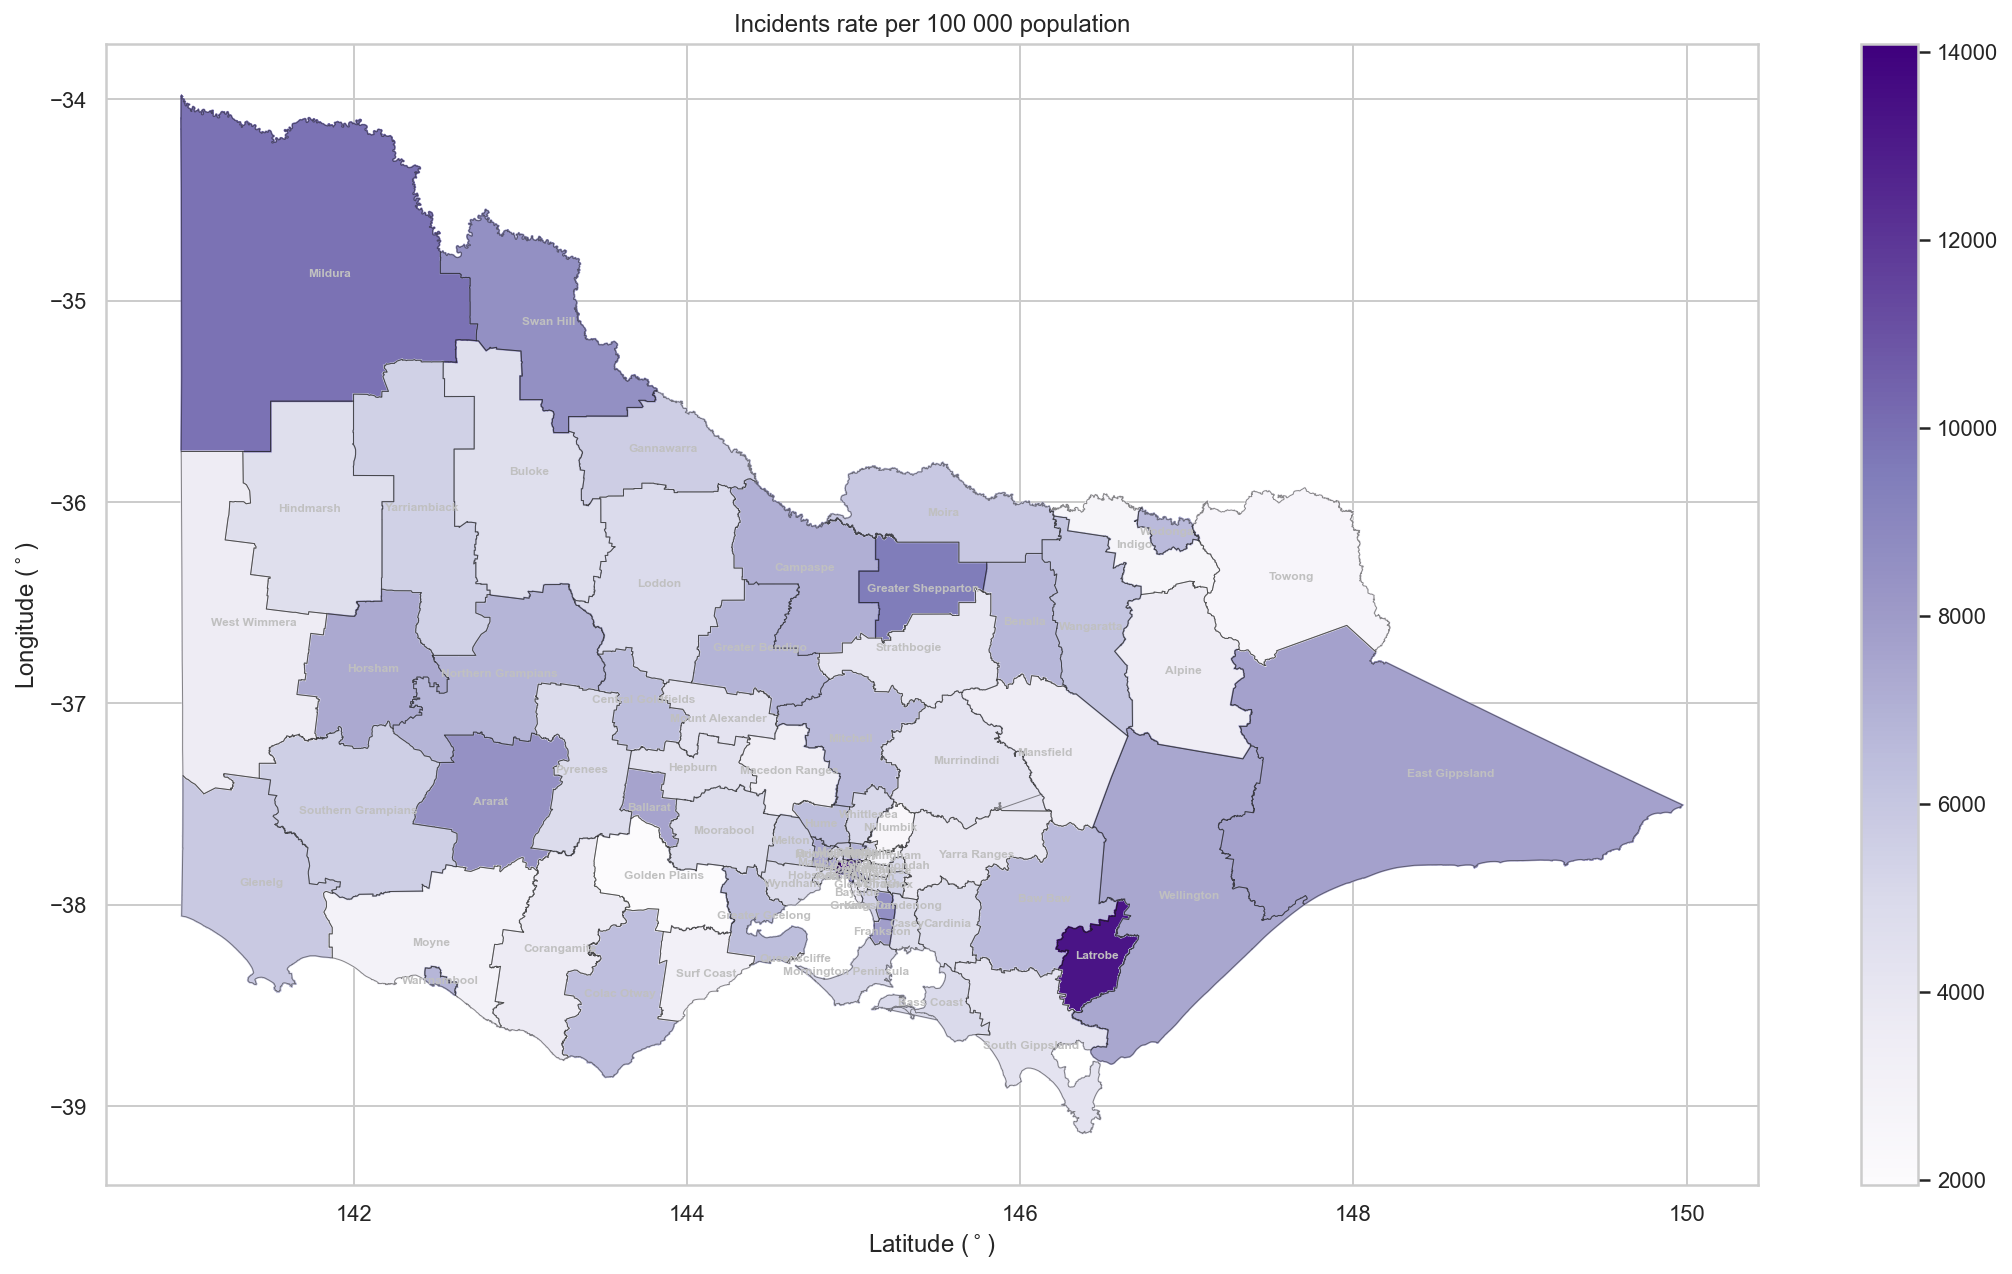

In [9]:
labels=pd.read_csv('lga_labels.txt',header=None)
lgas=labels[0]
#ind.set_index('Locality', inplace=True)
incidents=pd.read_csv('table_01.csv')
incidents = incidents[~incidents['Local Government Area'].isin(['Total'])]
incidents['Local Government Area'] = incidents['Local Government Area'].replace({' Colac-Otway':' Colac Otway'})
incidents.dropna()
#incidents.set_index('Year',inplace=True)
#print(incidents)
#print(incidents['Local Government Area','Rate per 100,000 population'])
year=incidents['Year'].apply(str)#.to_numpy()
lgaa=incidents['Local Government Area'].apply(str)#.to_numpy()
#lgaa['Local Government Area'] = lgaa['Local Government Area'].replace({'-':' '})
#print(year)
#print(year)
multi=[year,lgaa]
#print(incidents['Year'])
tuples = list(zip(*multi))
#print(tuples)
print(incidents.dtypes) 
index = pd.MultiIndex.from_tuples(tuples, names=['Year', 'Local Government Area'])
#inc['Inflation Rate'] = df['Inflation Rate'].astype(float) 

incidents['Rate per 100,000 population'] =incidents['Rate per 100,000 population'].str.replace(',', '')
incidents['Rate per 100,000 population'] = incidents['Rate per 100,000 population'].astype(float)
data_numpy=incidents['Rate per 100,000 population'].to_numpy()
print(incidents['Rate per 100,000 population'])
#incidents.convert_objects(convert_numeric=True)
#data_numpy.astype(np.float)
#s = pd.Series(np.random.randn(8), index=arrays)
#data['Rate per 100,000 population'].astype(float)
#data=pd.DataFrame(data_numpy,index=multi).dropna()


data=pd.DataFrame(data_numpy,index=index).dropna()




data_year=data.loc['2020']
plot_vic(data_year,lgas,title='Incidents rate per 100 000 population',limits=False)#this is the function that plots the map